In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [14]:
data = pd.read_csv('sales_timeseries.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data

,TotalSales
Date,
2022-01-01,934.137692
2022-01-02,674.789014
2022-01-03,1105.534033
2022-01-04,1113.770660
2022-01-05,858.990135
...,...
2022-12-27,1420.403449
2022-12-28,876.885462
2022-12-29,1158.683086


<Axes: title={'center': 'Daily Total Sales'}, xlabel='Date'>

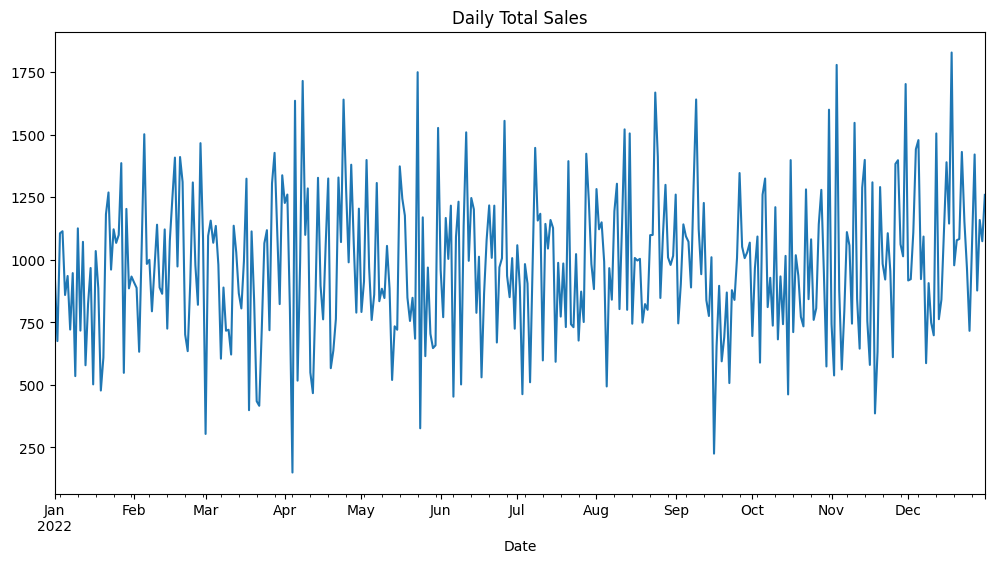

In [15]:
# Time Series Visualization
data['TotalSales'].plot(title='Daily Total Sales', figsize=(12, 6))

,TotalSales,MA_7
Date,,
2022-01-01,934.137692,NaN
2022-01-02,674.789014,NaN
2022-01-03,1105.534033,NaN
2022-01-04,1113.770660,NaN
2022-01-05,858.990135,NaN
...,...,...
2022-12-27,1420.403449,1119.998243
2022-12-28,876.885462,1090.598994
2022-12-29,1158.683086,1051.765890


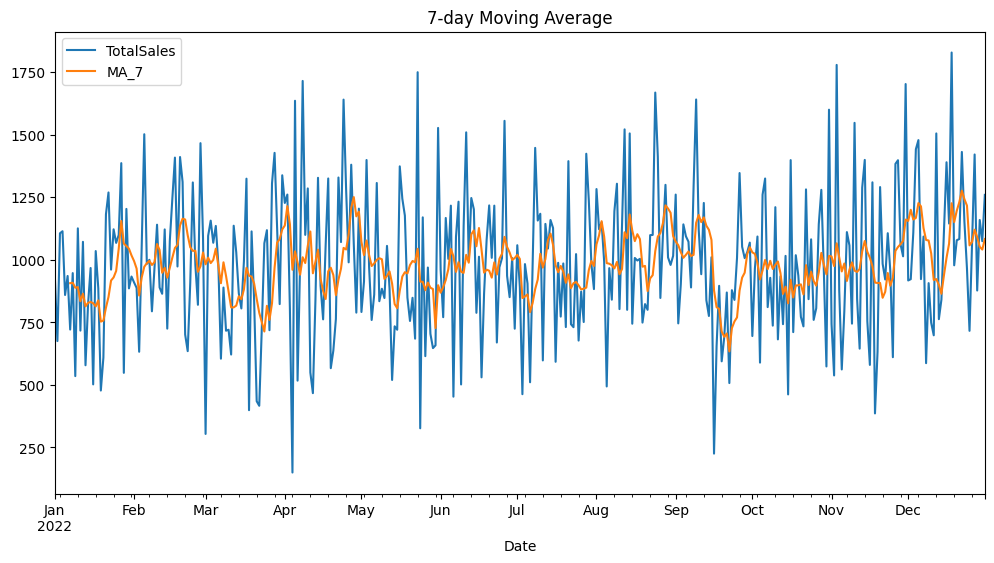

In [16]:
# Moving Average
data['MA_7'] = data['TotalSales'].rolling(window=7).mean()
data[['TotalSales', 'MA_7']].plot(title='7-day Moving Average', figsize=(12, 6))
data

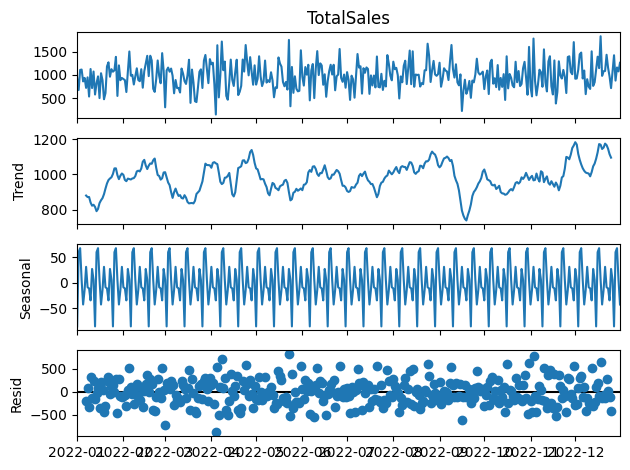

In [17]:
# Seasonal Decomposition
result = seasonal_decompose(data['TotalSales'], model='additive', period=12)
result.plot()
plt.show()

Augmented Dickey-Fuller (ADF) test. The purpose of this test is to determine whether the time series is stationary or not.

ADF Statistic: The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root. In other words, a highly negative value suggests stationarity.  
p-value: A p-value below a threshold (commonly 0.05) suggests that the null hypothesis (that the time series has a unit root and is non-stationary) can be rejected.

In [18]:
# Statistical Test for Stationarity
result_adf = adfuller(data['TotalSales'])
print('ADF Statistic: %f' % result_adf[0])
print('p-value: %f' % result_adf[1])

ADF Statistic: -10.098227
p-value: 0.000000


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


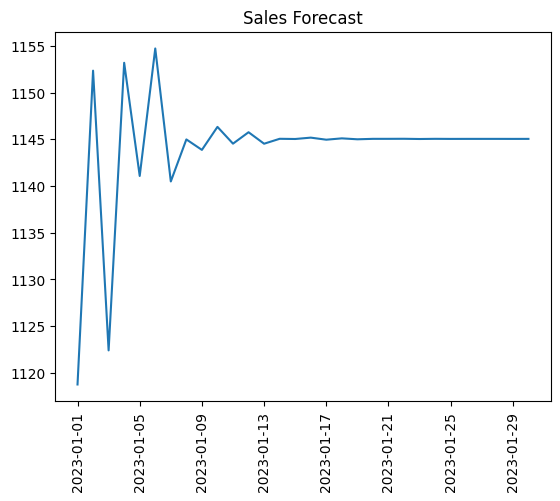

In [21]:
# Using SARIMAX for ARIMA modeling
model = SARIMAX(data['TotalSales'], order=(5,1,0), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.plot(forecast)
plt.title('Sales Forecast')
plt.xticks(rotation=90)
plt.show()